# LegCoHK

Author: [Pili Hu](http://hupili.net/)

GitHub repo: https://github.com/hupili/legcohk

Related notebooks:

   * PCA for [ENGG4030](https://course.ie.cuhk.edu.hk/~engg4030/): http://bit.ly/1riabfV
   * Recommender System for [ENGG4030](https://course.ie.cuhk.edu.hk/~engg4030/): http://bit.ly/QwNvLZ
   * Graph Analysis for [ENGG4030](https://course.ie.cuhk.edu.hk/~engg4030/): http://bit.ly/1mxjuqu
   
Compared with the above notebooks, 
this repo contains more compact notes covering the whole data mining flow --
from data collection to final visualization.
Interpretations will note be provided in the notes directly.
If you have interest, you can dump your thoughts on the [issue tracker](https://github.com/hupili/legcohk/issues).
You can also request other features there.

## Preparation

In [21]:
import requests
import pylab as pl
from pyquery import PyQuery as pq
import numpy as np
import matplotlib as plt
import scipy
import pandas as pd
from lxml import etree
import config
import os
from os import path

%matplotlib inline

In [212]:
# df = pd.DataFrame(records, columns = ['topic_id', 'member_id', 'vote'] + info_fields)
# df.to_csv('records-all-with-info.csv', encoding='utf-8')
df = pd.read_csv(path.join(config.DIR_DATA_ROOT, 'records-all-with-info.csv'), 
                 encoding='utf-8')
df[:5]
len(df['name-ch'].unique())
# 郭偉強, 郭偉强

70

In [214]:
for n in df['name-ch'].unique():
    print(n)

曾鈺成
何俊仁
李卓人
涂謹申
陳鑑林
梁耀忠
劉皇發
劉慧卿
譚耀宗
石禮謙
張宇人
馮檢基
方剛
王國興
李國麟
林健鋒
梁君彥
黃定光
湯家驊
何秀蘭
李慧琼
林大輝
陳克勤
陳健波
梁美芬
梁家騮
張國柱
黃國健
葉國謙
葉劉淑儀
謝偉俊
梁家傑
梁國雄
陳偉業
黃毓民
毛孟靜
田北辰
田北俊
吳亮星
何俊賢
易志明
胡志偉
姚思榮
范國威
馬逢國
莫乃光
陳志全
陳恒鑌
陳家洛
陳婉嫻
梁志祥
梁繼昌
麥美娟
郭家麒
郭偉强
郭榮鏗
張華峰
張超雄
單仲偕
黃碧雲
葉建源
葛珮帆
廖長江
潘兆平
鄧家彪
蔣麗芸
盧偉國
鍾國斌
鍾樹根
謝偉銓


In [23]:
# df = pd.read_csv(path.join(config.DIR_DATA_ROOT, 'records-all.csv'), 
#                 encoding='utf-8')

df = df[['topic_id', 'member_id', 'vote']]
# df.to_csv('records-all.csv', encoding='utf-8')
df[:5]

,topic_id,member_id,vote
0,17/10/2012-1,TSANG Yok-sing,Present
1,17/10/2012-1,Albert HO,Yes
2,17/10/2012-1,LEE Cheuk-yan,Yes
3,17/10/2012-1,James TO,Yes
4,17/10/2012-1,CHAN Kam-lam,No


## Let's play

In [24]:
print('total # of motions:', len(df['topic_id'].unique()))
print('total # of members:',len(df['member_id'].unique()))
print('total # of records:', len(df))

total # of motions: 2921
total # of members: 70
total # of records: 204470


**NOTE**: Do sanity check, whether the numbers multiply to the total number of records

In [25]:
print(df['vote'].unique())

['Present' 'Yes' 'No' 'Absent' 'Abstain']


In [26]:
print(df['member_id'].unique())

['TSANG Yok-sing' 'Albert HO' 'LEE Cheuk-yan' 'James TO' 'CHAN Kam-lam'
 'LEUNG Yiu-chung' 'Dr LAU Wong-fat' 'Emily LAU' 'TAM Yiu-chung'
 'Abraham SHEK' 'Tommy CHEUNG' 'Frederick FUNG' 'Vincent FANG'
 'WONG Kwok-hing' 'Prof Joseph LEE' 'Jeffrey LAM' 'Andrew LEUNG'
 'WONG Ting-kwong' 'Ronny TONG' 'Cyd HO' 'Starry LEE' 'Dr LAM Tai-fai'
 'CHAN Hak-kan' 'CHAN Kin-por' 'Dr Priscilla LEUNG' 'Dr LEUNG Ka-lau'
 'CHEUNG Kwok-che' 'WONG Kwok-kin' 'IP Kwok-him' 'Mrs Regina IP' 'Paul TSE'
 'Alan LEONG' 'LEUNG Kwok-hung' 'Albert CHAN' 'WONG Yuk-man' 'Claudia MO'
 'Michael TIEN' 'James TIEN' 'NG Leung-sing' 'Steven HO' 'Frankie YICK'
 'WU Chi-wai' 'YIU Si-wing' 'Gary FAN' 'MA Fung-kwok' 'Charles Peter MOK'
 'CHAN Chi-chuen' 'CHAN Han-pan' 'Dr Kenneth CHAN' 'CHAN Yuen-han'
 'LEUNG Che-cheung' 'Kenneth LEUNG' 'Alice MAK' 'Dr KWOK Ka-ki'
 'KWOK Wai-keung' 'Dennis KWOK' 'Christopher CHEUNG' 'Dr Fernando CHEUNG'
 'SIN Chung-kai' 'Dr Helena WONG' 'IP Kin-yuen' 'Dr Elizabeth QUAT'
 'Martin LIAO' 'POON Siu-

In [27]:
print(df['topic_id'].unique())

['17/10/2012-1' '17/10/2012-2' '17/10/2012-3' ..., '11/06/2015-8'
 '11/06/2015-9' '18/06/2015-1']


In [28]:
# A leader board of voting types
board_pos = pd.DataFrame(index=range(0,5))
for v in df['vote'].unique():
    count = df[df['vote']==v].groupby('member_id').count().sort('vote', ascending=False)['vote']
    count = count.reset_index()[:5]
    board_pos[v] = pd.Series(list(zip(count['member_id'], count['vote'])), index=range(0,5))
board_pos

,Present,Yes,No,Absent,Abstain
0,"(TSANG Yok-sing, 2895)","(LEUNG Kwok-hung, 1832)","(Ir Dr LO Wai-kwok, 2391)","(Dr LEUNG Ka-lau, 2593)","(Gary FAN, 482)"
1,"(Emily LAU, 1099)","(Albert CHAN, 1757)","(TAM Yiu-chung, 2373)","(Ronny TONG, 2480)","(MA Fung-kwok, 123)"
2,"(SIN Chung-kai, 1083)","(CHAN Chi-chuen, 1653)","(WONG Ting-kwong, 2352)","(LEUNG Yiu-chung, 2454)","(IP Kwok-him, 119)"
3,"(CHEUNG Kwok-che, 1045)","(WONG Yuk-man, 598)","(POON Siu-ping, 2298)","(Frederick FUNG, 2357)","(CHAN Kam-lam, 117)"
4,"(Cyd HO, 991)","(Charles Peter MOK, 486)","(Christopher CHEUNG, 2293)","(James TO, 2334)","(Steven HO, 117)"


In [29]:
board_neg = pd.DataFrame(index=range(0,5))
for v in df['vote'].unique():
    count = df[df['vote']==v].groupby('member_id').count().sort('vote', ascending=True)['vote']
    count = count.reset_index()[:5]
    board_neg[v] = pd.Series(list(zip(count['member_id'], count['vote'])), index=range(0,5))
board_neg

,Present,Yes,No,Absent,Abstain
0,"(YIU Si-wing, 1)","(Dr LAU Wong-fat, 106)","(James TO, 70)","(TSANG Yok-sing, 26)","(Dennis KWOK, 14)"
1,"(James TIEN, 1)","(Abraham SHEK, 114)","(Ronny TONG, 72)","(POON Siu-ping, 39)","(Dr LAU Wong-fat, 15)"
2,"(Dr CHIANG Lai-wan, 1)","(Dr LEUNG Ka-lau, 144)","(Albert HO, 78)","(TAM Yiu-chung, 51)","(Vincent FANG, 15)"
3,"(NG Leung-sing, 1)","(Dr LAM Tai-fai, 168)","(IP Kin-yuen, 80)","(WONG Ting-kwong, 92)","(Frederick FUNG, 17)"
4,"(IP Kwok-him, 1)","(Vincent FANG, 189)","(Prof Joseph LEE, 80)","(Ir Dr LO Wai-kwok, 107)","(Charles Peter MOK, 19)"


In [77]:
df_matrix = pd.DataFrame(index=df['member_id'].unique())
for gn, g in df.groupby('topic_id'):
    df_matrix[gn] = g.set_index('member_id')['vote']
df_matrix_orig = df_matrix
df_matrix[:5]

,01/02/2013-1,01/02/2013-2,01/02/2013-3,01/02/2013-4,01/02/2013-5,01/02/2013-6,01/02/2013-7,01/02/2013-8,03/06/2015-1,03/06/2015-10,...,31/10/2012-2,31/10/2012-3,31/10/2012-4,31/10/2012-5,31/10/2012-6,31/10/2012-7,31/10/2012-8,31/10/2012-9,31/10/2014-38,31/10/2014-39
TSANG Yok-sing,Present,Present,Present,Present,Present,Present,Present,Present,Present,Present,...,Present,Present,Present,Present,Present,Present,Present,Present,Present,Present
Albert HO,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Present,Absent,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,No
LEE Cheuk-yan,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Present,Absent,...,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Absent,Yes,No
James TO,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Absent,Absent,...,Yes,Yes,Yes,Absent,Absent,Absent,Absent,Absent,Yes,No
CHAN Kam-lam,No,No,No,No,Abstain,No,No,Yes,Yes,No,...,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Yes,Abstain,No,Yes


In [31]:
def to_numeric(x):
    x[(x != 'Yes') & (x != 'No')] = 0
    x[x == 'Yes'] = 1
    x[x == 'No'] = -1
df_matrix.apply(to_numeric)
df_matrix[:5]

,01/02/2013-1,01/02/2013-2,01/02/2013-3,01/02/2013-4,01/02/2013-5,01/02/2013-6,01/02/2013-7,01/02/2013-8,03/06/2015-1,03/06/2015-10,...,31/10/2012-2,31/10/2012-3,31/10/2012-4,31/10/2012-5,31/10/2012-6,31/10/2012-7,31/10/2012-8,31/10/2012-9,31/10/2014-38,31/10/2014-39
TSANG Yok-sing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Albert HO,1,1,1,1,-1,1,1,-1,0,0,...,1,1,1,1,1,1,-1,-1,1,-1
LEE Cheuk-yan,1,1,1,1,1,1,1,-1,0,0,...,0,0,0,0,0,0,0,0,1,-1
James TO,1,1,1,1,-1,1,1,-1,0,0,...,1,1,1,0,0,0,0,0,1,-1
CHAN Kam-lam,-1,-1,-1,-1,0,-1,-1,1,1,-1,...,0,0,0,0,0,0,1,0,-1,1


In [32]:
X = matrix(df_matrix.as_matrix()).astype('float')
X = X - mean(X, 0)
C = X.T * X
print(C.shape)

(2921, 2921)


In [33]:
import scipy.sparse.linalg
PA = scipy.sparse.linalg.eigs(C, k=2, which='LM', return_eigenvectors=True)[1]

(3, 70)


/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:19: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:20: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/lib/python3.4/site-packages/IPython/kernel/__main__.py:21: ComplexWarning: Casting complex values to real discards the imaginary part


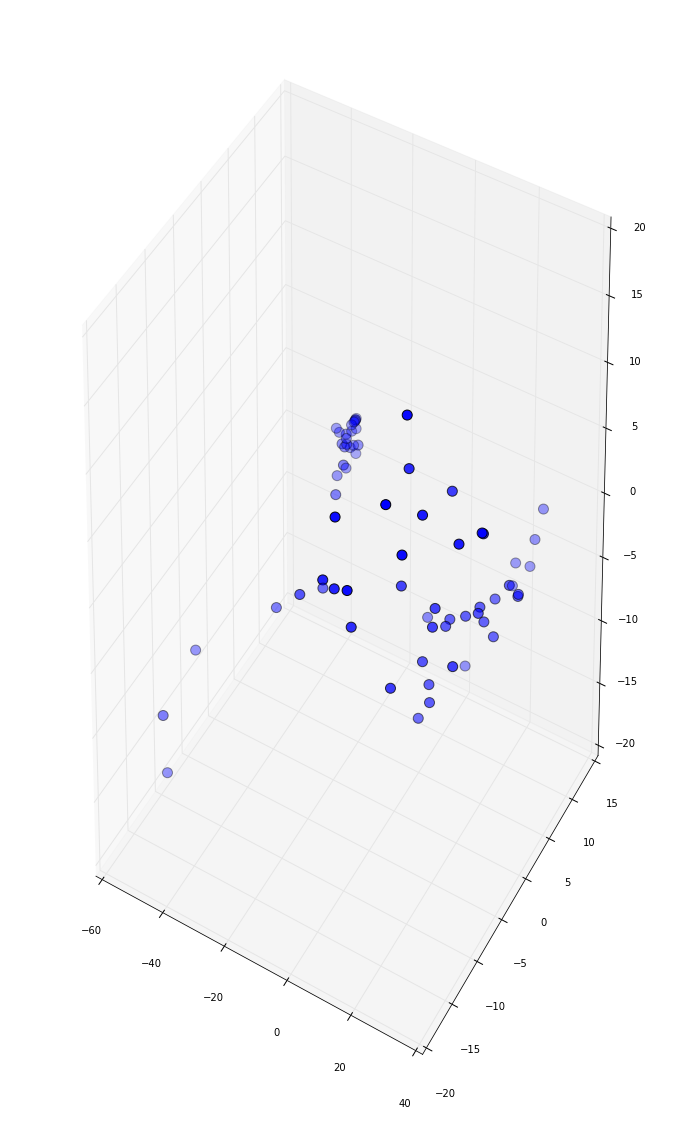

In [68]:
# Use the following one to pop up the 3D plot in another window.
# Good for interactive exploration.
# May or may not be available due to your desktop.
#%pylab 
#matplotlib.use('TkAgg') 
# Use the following one to plot inline (embedded in this notebook).
#%pylab inline


# Try 3D
PA = scipy.sparse.linalg.eigs(C, k=3, which='LM', return_eigenvectors=True)[1]
# Project data points onto principle axis
X_3D = PA.T * X.T
print(X_3D.shape)
# We intentionally add some disturbance for better visualization.
# Or else, some of the nodes are located in the same place.
# (Those who vote exactly the same)
X_3D = X_3D + randn(*tuple(X_3D.shape)) * 0.3
x = array(X_3D[0, :]).astype('float')
y = array(X_3D[1, :]).astype('float')
z = array(X_3D[2, :]).astype('float')

from mpl_toolkits.mplot3d import Axes3D
fig = figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, picker=True, s=100)

[-53.930846892379947, 47.645734190149241, 0, 72]

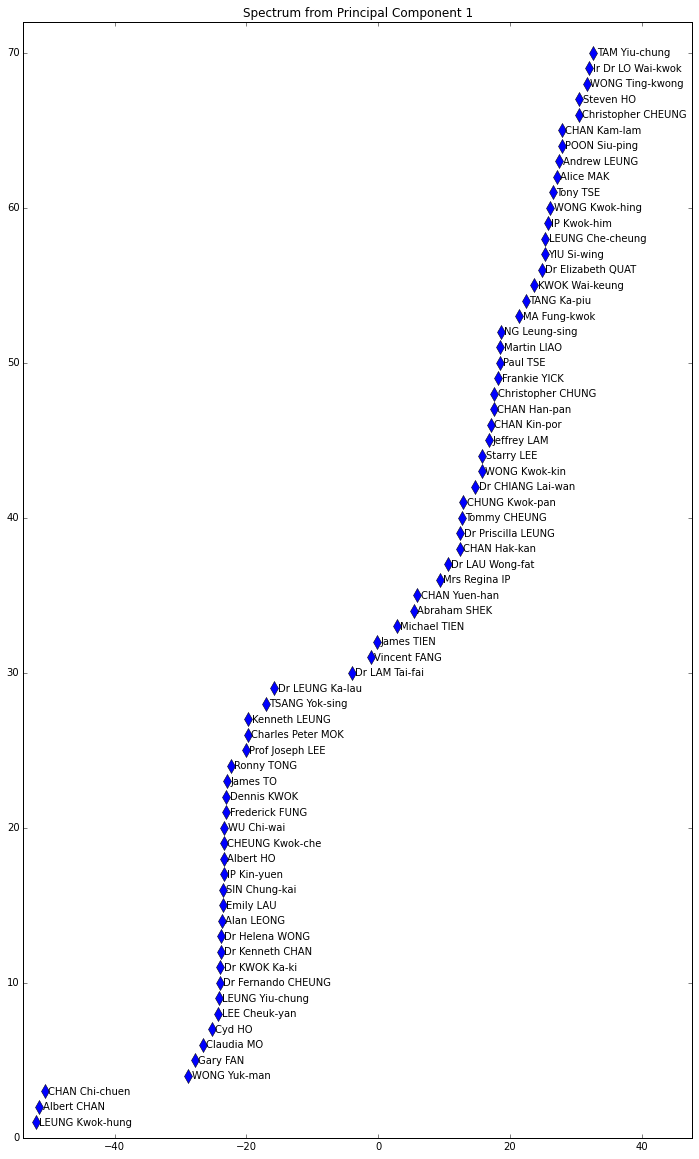

In [69]:
#x = -x
df_pc1 = pd.DataFrame(x.flatten(), index=df_matrix.index, columns=['PC1'])
if df_pc1.ix['TSANG Yok-sing'].PC1 < df_pc1.ix['LEUNG Kwok-hung'].PC1:
    df_pc1.PC1 = df_pc1.PC1.apply(lambda x: -x)
df_pc1 = df_pc1.sort('PC1')
figure(figsize(12, 20))
plot(df_pc1['PC1'], df_pc1.rank()['PC1'], 'd', markersize=10)
#yticks(df_pc1.rank()['PC1'], df_pc1.index)
for (_x, _y, _s) in zip(df_pc1['PC1'], df_pc1.rank()['PC1'], df_pc1.index):
    annotate(_s, (_x, _y), xytext=(_x + 0.5, _y - 0.2))
title('Spectrum from Principal Component 1')
axis([df_pc1.PC1.min() - 2, df_pc1.PC1.max() + 15, 0, 72])

In [72]:
df_pcs = pd.DataFrame(list(zip(list(x.flatten()), list(y.flatten()), list(z.flatten()))), 
                      index=df_matrix.index, columns=['PC1', 'PC2', 'PC3'])

In [75]:
df_pcs.to_csv(path.join(config.DIR_DATA_ROOT, 'voting-PC1to3.csv'))

In [83]:
df_matrix_orig.ix['TSANG Yok-sing'].value_counts()

Present    2895
Absent       26
dtype: int64

In [93]:
df_tsang = pd.DataFrame()
df_tsang['Absent'] = df_matrix_orig.ix['TSANG Yok-sing'][df_matrix_orig.ix['TSANG Yok-sing'] == 'Absent']

In [215]:
df_info = pd.read_csv(path.join(config.DIR_DATA_ROOT, 'records-all-with-info.csv'), 
                 encoding='utf-8')

In [102]:
df_motion = df_info[['topic_id', 'motion-en']].drop_duplicates().set_index('topic_id')

In [108]:
df_tsang.join(df_motion).to_csv(path.join(config.DIR_DATA_ROOT, 'tsang-absent.csv'))

In [191]:
df_info[df_info.vote == 'Present']['member_id'].value_counts()

TSANG Yok-sing        2895
Emily LAU             1099
SIN Chung-kai         1083
CHEUNG Kwok-che       1045
Cyd HO                 991
Albert HO              880
Charles Peter MOK      874
Kenneth LEUNG          562
WU Chi-wai             530
Alan LEONG             501
Dennis KWOK            310
Dr KWOK Ka-ki          302
LEE Cheuk-yan          300
Dr Fernando CHEUNG     267
Dr Kenneth CHAN        265
Dr Helena WONG         251
James TO               190
IP Kin-yuen            186
Prof Joseph LEE        165
Frederick FUNG         142
Ronny TONG              84
Claudia MO              36
Andrew LEUNG            26
Abraham SHEK             7
CHAN Yuen-han            7
KWOK Wai-keung           6
WONG Kwok-hing           6
Albert CHAN              5
Dr Elizabeth QUAT        4
TANG Ka-piu              4
Alice MAK                4
WONG Kwok-kin            4
MA Fung-kwok             3
LEUNG Kwok-hung          3
CHAN Chi-chuen           3
POON Siu-ping            3
LEUNG Yiu-chung          2
C

In [139]:
combined_topic_vote = df_info[df_info.vote == 'Present'][['topic_id', 'vote']].apply(lambda x: (x[0], x[1]), axis=1)

In [160]:
pd.DataFrame(combined_topic_vote.value_counts(), columns = ['Counts']).to_csv(path.join(config.DIR_DATA_ROOT, 'present-stats.csv'))

In [167]:
possible_members = df_info.member_id.unique()
possible_topics = df_info.topic_id.unique()
possible_votes = df_info.vote.unique()

In [203]:
#df_leaderboard = pd.DataFrame(possible_members, index=possible_members, columns=['Name'])
df_leaderboard = pd.DataFrame(index=possible_members)
for v in possible_votes: #['Yes', 'No', 'Present', 'Absent', 'Abstain']:
    value_counts = df_info[df_info.vote == v]['member_id'].value_counts()
    df_leaderboard = df_leaderboard.join(pd.DataFrame(value_counts,
                                                      index=possible_members,
                                                      columns=[v]))
df_leaderboard = df_leaderboard.fillna(0)
df_leaderboard['Total'] = df_leaderboard.apply(lambda x: x.sum(), axis=1)
df_leaderboard.sort('Present', ascending=False)
df_leaderboard.to_csv(path.join(config.DIR_DATA_ROOT, 'member-vote-stats.csv'))

In [216]:
pd.DataFrame(df_info[df_info.vote == v]['member_id'].value_counts(),
                                    index=possible_members)

,0
TSANG Yok-sing,NaN
Albert HO,40
LEE Cheuk-yan,32
James TO,40
CHAN Kam-lam,117
LEUNG Yiu-chung,26
Dr LAU Wong-fat,15
Emily LAU,51
TAM Yiu-chung,117
Abraham SHEK,42


In [255]:
df_leung_motions = df_info[df_info['mover-en'] == 'LEUNG Kwok-hung'][df_info['member_id'] == 'LEUNG Kwok-hung']

/Users/hupili/Desktop/initium/hk_legco/venv/lib/python3.4/site-packages/pandas/core/frame.py:1825: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


In [256]:
import datetime
def datestr_to_datetime(datestr):
    d, m, y = datestr.split('/')
    return datetime.datetime(int(y), int(m), int(d))
    
#df_leung_motions['vote-date-y'] = df_leung_motions['vote-date'].apply(lambda x: x.split('/')[2])
#df_leung_motions['vote-date-m'] = df_leung_motions['vote-date'].apply(lambda x: x.split('/')[1])
#df_leung_motions['vote-date-d'] = df_leung_motions['vote-date'].apply(lambda x: x.split('/')[0])

df_leung_motions['vote-date-dt'] = df_leung_motions['vote-date'].apply(datestr_to_datetime)

In [277]:
figsize(5, 5)
print(len(df_leung_motions))

1066


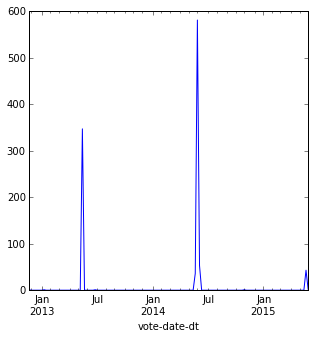

In [264]:
df_leung_motions.set_index('vote-date-dt').resample('1w', how='count').topic_id.plot()

In [272]:
self_motions = df_info[df_info['member_id']==df_info['mover-en']]

In [278]:
self_motions[self_motions.vote != 'Yes'].to_csv(
    path.join(config.DIR_DATA_ROOT, 'self-motions-non-yes.csv'))

17    295
18    267
15    263
20    256
12    246
21    231
11    228
14    213
16    203
10    180
19    170
22    166
9     128
23     39
13     27
0       9
dtype: int64

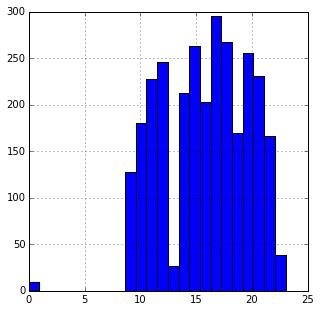

In [296]:
df_vote_time = df_info[['topic_id', 'vote-time']].drop_duplicates()
df_vote_time['vote-time'].apply(lambda x: int(x[:2])).hist(bins=24)
df_vote_time['vote-time'].apply(lambda x: int(x[:2])).value_counts()

In [307]:
df_info['vote-time-h'] = df_vote_time['vote-time'].apply(lambda x: int(x[:2]))
df_rare_time_votes = df_info[(df_info['vote-time-h'] == 23) 
                             | (df_info['vote-time-h'] == 13) 
                             | (df_info['vote-time-h'] == 0)]
df_rare_time_votes.to_csv(path.join(config.DIR_DATA_ROOT, 'rare-time-votes.csv'))

In [356]:
s_total = df_info['mover-en'].value_counts()
df_mover_stats = pd.DataFrame(s_total / 70, columns = ['Total motions'])
df_mover_stats['Total Votes Obtained'] = s_total
for vote in possible_votes:
    s_vote = df_info[df_info.vote == vote]['mover-en'].value_counts()
    df_mover_stats[vote] = s_vote
    df_mover_stats['%s Ratio' % vote] = s_vote / s_total
df_mover_stats = df_mover_stats.fillna(0)
df_mover_stats.to_csv(path.join(config.DIR_DATA_ROOT, 'mover-stats.csv'))

In [318]:
for (gname, g) in df_info.groupby(['mover-en', 'name-en']):
    print(gname, '\n', g.vote.value_counts())
#len(df_info)

('Abraham SHEK', 'Abraham SHEK') 
 Yes    3
dtype: int64
('Abraham SHEK', 'Alan LEONG') 
 No        2
Absent    1
dtype: int64
('Abraham SHEK', 'Albert CHAN') 
 No    3
dtype: int64
('Abraham SHEK', 'Albert HO') 
 No    3
dtype: int64
('Abraham SHEK', 'Alice MAK') 
 No     2
Yes    1
dtype: int64
('Abraham SHEK', 'Andrew LEUNG') 
 Yes    3
dtype: int64
('Abraham SHEK', 'CHAN Chi-chuen') 
 No    3
dtype: int64
('Abraham SHEK', 'CHAN Hak-kan') 
 Yes        1
Abstain    1
No         1
dtype: int64
('Abraham SHEK', 'CHAN Han-pan') 
 Absent     2
Abstain    1
dtype: int64
('Abraham SHEK', 'CHAN Kam-lam') 
 Yes        1
Abstain    1
No         1
dtype: int64
('Abraham SHEK', 'CHAN Kin-por') 
 No     2
Yes    1
dtype: int64
('Abraham SHEK', 'CHAN Yuen-han') 
 No     2
Yes    1
dtype: int64
('Abraham SHEK', 'CHEUNG Kwok-che') 
 No    3
dtype: int64
('Abraham SHEK', 'CHUNG Kwok-pan') 
 Yes    3
dtype: int64
('Abraham SHEK', 'Charles Peter MOK') 
 No    3
dtype: int64
('Abraham SHEK', 'Christoph

In [319]:
g

,Unnamed: 0,topic_id,member_id,vote,name-en,name-ch,vote-date,vote-time,motion-en,motion-ch,mover-en,mover-ch,mover-type,vote-separate-mechanism,vote-time-h
162582,162582,26/03/2015-8,YIU Si-wing,Yes,YIU Si-wing,姚思榮,26/03/2015,17:25:25,AMENDMENT BY HON YIU SI-WING TO HON VINCENT FA...,姚思榮議員對方剛議員的「平衡旅遊業對香港經濟和市民的影響」議案作出的修正案,YIU Si-wing,姚思榮,Member,Yes,NaN
203392,203392,04/06/2015-38,YIU Si-wing,Yes,YIU Si-wing,姚思榮,04/06/2015,13:11:17,AMENDMENT BY HON YIU SI-WING TO HON CHAN YUEN-...,姚思榮議員對陳婉嫻議員的「立法制訂標準工時」議案作出的修正案,YIU Si-wing,姚思榮,Member,Yes,NaN
